In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('spam_ham_dataset.csv')

In [3]:
df.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [4]:
df.drop('Unnamed: 0', axis = 1, inplace = True)

In [5]:
df.drop('label', axis = 1, inplace = True)

In [6]:
df.rename(columns={'label_num': 'label' },inplace = True)

In [7]:
df

,text,label
0,Subject: enron methanol ; meter # : 988291\r\n...,0
1,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,"Subject: photoshop , windows , office . cheap ...",1
4,Subject: re : indian springs\r\nthis deal is t...,0
...,...,...
5166,Subject: put the 10 on the ft\r\nthe transport...,0
5167,Subject: 3 / 4 / 2000 and following noms\r\nhp...,0
5168,Subject: calpine daily gas nomination\r\n>\r\n...,0
5169,Subject: industrial worksheets for august 2000...,0


### Preprocessing

In [8]:
import nltk
import re

C:\Users\chama\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [9]:
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords

In [10]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\chama\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\chama\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [11]:
def clean(text):
    
    text = text.lower()
    
    text = re.sub(r'http.?://[^\s]+[\s]?', '', text)
    
    text = nltk.word_tokenize(text)
    
    stop_words = set(stopwords.words('english'))
    text = [word for word in text if word not in stop_words]
    
    ps = PorterStemmer()
    text = [ps.stem(word) for word in text]
    
    lm = WordNetLemmatizer()
    text = [lm.lemmatize(word) for word in text]
    
    return " ".join(text)

In [12]:
df ['cleaned_text'] = df['text'].apply(clean)
df

,text,label,cleaned_text
0,Subject: enron methanol ; meter # : 988291\r\n...,0,subject : enron methanol ; meter # : 988291 fo...
1,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,"subject : hpl nom januari 9 , 2001 ( see attac..."
2,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,"subject : neon retreat ho ho ho , ' around won..."
3,"Subject: photoshop , windows , office . cheap ...",1,"subject : photoshop , window , offic . cheap ...."
4,Subject: re : indian springs\r\nthis deal is t...,0,subject : : indian spring deal book teco pvr r...
...,...,...,...
5166,Subject: put the 10 on the ft\r\nthe transport...,0,subject : put 10 ft transport volum decreas 25...
5167,Subject: 3 / 4 / 2000 and following noms\r\nhp...,0,subject : 3 / 4 / 2000 follow nom hpl ' take e...
5168,Subject: calpine daily gas nomination\r\n>\r\n...,0,"subject : calpin daili ga nomin > > juli , men..."
5169,Subject: industrial worksheets for august 2000...,0,subject : industri worksheet august 2000 activ...


### Feature Extraction

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [14]:
tfidf = TfidfVectorizer()

In [15]:
X = tfidf.fit_transform(df['cleaned_text']).toarray()
y = df['label']

# Naive Bayes Classifier

### Train Model

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 32)

In [17]:
from sklearn.naive_bayes import MultinomialNB

In [18]:
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train,y_train)

MultinomialNB()

### Make Predictions

In [37]:
nb_predictions = nb_classifier.predict(X_test)

###  Evaluate the Model

In [57]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score

In [20]:
accuracy_score(y_test, predictions)

0.9082125603864735

In [74]:
nb_precision = precision_score(y_test, nb_predictions)
nb_recall = recall_score(y_test, nb_predictions)
nb_f1 = f1_score(y_test, nb_predictions)

print(f"Precision: {nb_precision:.2f}")
print(f"Recall: {nb_recall:.2f}")
print(f"F1 Score: {nb_f1:.2f}")

Precision: 0.99
Recall: 0.70
F1 Score: 0.82


In [75]:
import matplotlib.pyplot as plt
import seaborn as sns

In [76]:
nb_cm = confusion_matrix(y_test, nb_predictions)

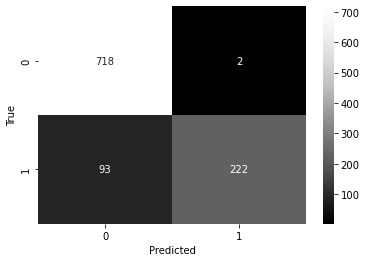

In [88]:
sns.heatmap(nb_cm, annot=True, cmap='Greys_r', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# SVM Classifier

### Train the Model

In [21]:
from sklearn import svm

In [22]:
svm_classifier = svm.SVC()   
svm_classifier.fit(X_train, y_train)

SVC()

### Make Predictions

In [23]:
svm_predictions=svm_classifier.predict(X_test)

### Evaluate the Model

In [24]:
accuracy_score(y_test,svm_predictions)

0.9932367149758454

In [44]:
svm_precision = precision_score(svm_predictions, y_test)
svm_recall = recall_score(svm_predictions, y_test)
svm_f1 = f1_score(svm_predictions, y_test)

In [50]:
print(f'precision : {svm_precision:.2f}')
print(f'recall : {svm_recall:.2f}')
print(f'f1 score : {svm_f1:.2f}')

precision : 0.99
recall : 0.98
f1 score : 0.99


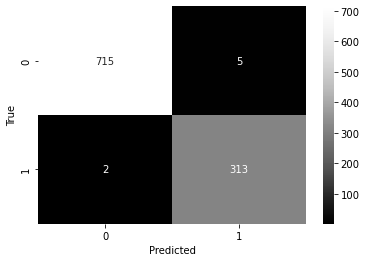

In [89]:
svm_cm = confusion_matrix(y_test, svm_predictions)
sns.heatmap(svm_cm, annot=True, cmap='Greys_r', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Decision Tree

### Train the Model

In [25]:
from sklearn.tree import DecisionTreeClassifier

In [26]:
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier()

### Make Predictions

In [27]:
dt_predictions = dt_classifier.predict(X_test)

### Evaluate the Model

In [28]:
accuracy_score(y_test, dt_predictions)

0.9468599033816425

In [51]:
dt_precision = precision_score(y_test, dt_predictions)
dt_recall = recall_score(y_test, dt_predictions)
dt_f1 = f1_score(y_test, dt_predictions)

print(f"Precision: {dt_precision:.2f}")
print(f"Recall: {dt_recall:.2f}")
print(f"F1 Score: {dt_f1:.2f}")

Precision: 0.90
Recall: 0.92
F1 Score: 0.91


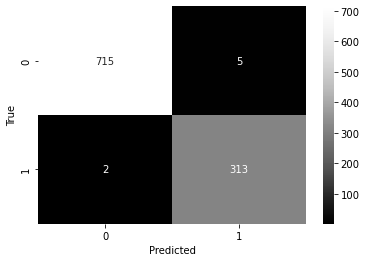

In [90]:
dt_cm = confusion_matrix(y_test, svm_predictions)
sns.heatmap(dt_cm, annot=True, cmap='Greys_r', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Logistic Regression

### Train the Model

In [29]:
from sklearn.linear_model import LogisticRegression

In [30]:
lr_classifier = LogisticRegression()
lr_classifier.fit(X_train, y_train)

LogisticRegression()

### Make Predictions

In [31]:
lr_predictions = lr_classifier.predict(X_test)

### Evaluate the Model 

In [32]:
accuracy_score(y_test, lr_predictions)

0.9903381642512077

In [80]:
lr_precision = precision_score(y_test, lr_predictions)
lr_recall = recall_score(y_test, lr_predictions)
lr_f1 = f1_score(y_test, lr_predictions)

print(f"Precision: {lr_precision:.2f}")
print(f"Recall: {lr_recall:.2f}")
print(f"F1 Score: {lr_f1:.2f}")

Precision: 0.98
Recall: 0.99
F1 Score: 0.98


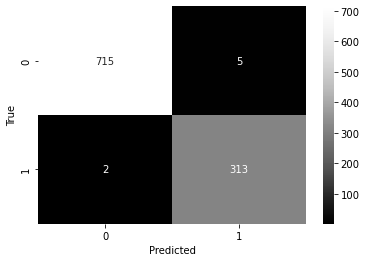

In [91]:
lr_cm = confusion_matrix(y_test, svm_predictions)
sns.heatmap(lr_cm, annot=True, cmap='Greys_r', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()